# Chapter 10 - Simple Linear

## By Fedelin Thelicieux

## What does a Simple Linear Regression Model do?
#### It is a statistical method that allows us to summarize and study relationships between two or multiple continuous variables.

In [75]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [76]:
data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## **Pearson Correlation Coefficient(r-value)**
* Measures the type and strenght of the linear correlation between two variables
* R-values range from 1.0 to -1.0
* 1.0 indicate a positive correlation
* -1.0 indicate a negative correlation
* When there are 
* more than two categories

In [77]:
data.corr().head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<AxesSubplot:>

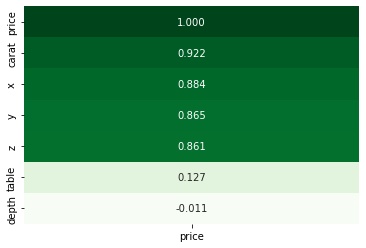

In [78]:
sns.heatmap(data=data.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='Greens', cbar=False, fmt=f'.3f')

## **Procedure for Creating and Using a Regression Model**
* Split dataset
* Create model from training dataset
* Validate model with test dataset
* If model is valid predict data with it

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(data[['carat']], data[['price']], test_size=0.30, random_state=20)

In [81]:
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

LinearRegression()

In [82]:
linearModel.score(x_test, y_test)

0.8504107786474794

In [83]:
y_predicted = linearModel.predict(x_test)
y_predicted

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [84]:
predicted = pd.DataFrame(y_predicted, columns=['price_predicted'])
predicted.head(3)

,price_predicted
0,9540.641914
1,1940.075433
2,3180.984246


In [85]:
combined = predicted.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
combined.head(5)

,price_predicted,carat,price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980


In [86]:
melted = pd.melt(combined, id_vars=['carat'],value_vars=['price','price_predicted'], var_name='price_type', value_name='price_value')

In [87]:
melted

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,price_predicted,156.269013
32360,1.01,price_predicted,5585.245072
32361,1.53,price_predicted,9618.198715
32362,0.23,price_predicted,-464.185393


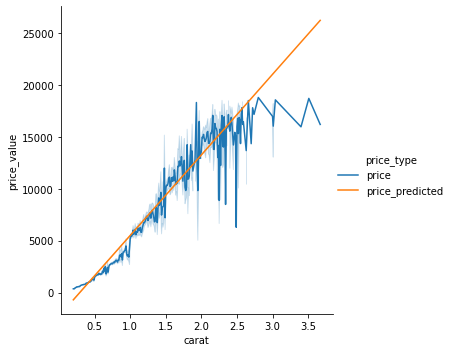

In [89]:
sns.relplot(data=melted, kind='line', x='carat', y='price_value', hue='price_type')

## b is the **Y-intercept**

In [90]:
x=data.carat.values.reshape(-1,1)
y=data.price

In [91]:
Ir=LinearRegression()
predicted=Ir.fit(x,y)

In [92]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is{m} and the y-intercept is {b}')

The slope is[7756.42561797] and the y-intercept is -2256.3605800453984


In [93]:
print(f'Regression line equation is y = {m}x + {b}')

Regression line equation is y = [7756.42561797]x + -2256.3605800453984


In [113]:
x=0.70
y=m*x+b
print(f'The predicted price for a 0.70 carat diamond is $ {y}')

The predicted price for a 0.70 carat diamond is $ [3173.13735253]


In [107]:
x1=0.54
yy=m*x1+b
print(f'The predicted price for a 0.54 carat diamond is $ {yy}')

The predicted price for a 0.54 carat diamond is $ [1932.10925366]


## They are not close.
### Predicted price on 18: 0.70 is $ 2,657 and 0.54 is $ 1,637
